<a href="https://colab.research.google.com/github/amalsalilan/GlucoSense_AI-Powered_Diabetes_Detection_for_Early_Intervention_Infosys_Internship_Oct2025/blob/Aswani/EDA_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

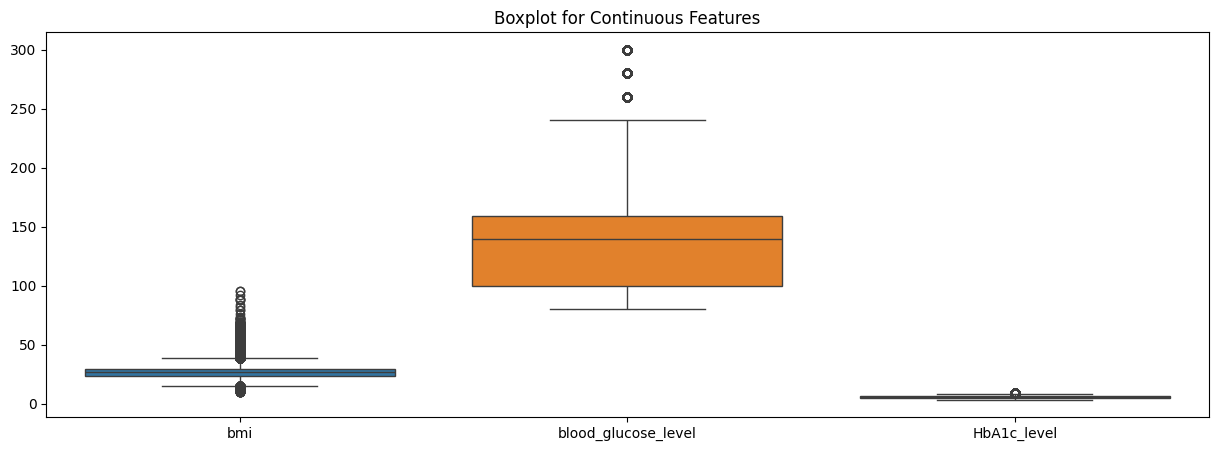

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/diabetes_prediction_dataset.csv")  # Replace with your dataset path

# Check for missing values and summary statistics
print(df)
print(df.info())  # Gives a summary of the dataset, including missing values
print(df.describe())  # Summary statistics for continuous variables

# Boxplots for outlier detection in continuous features
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['bmi', 'blood_glucose_level', 'HbA1c_level']])
plt.title('Boxplot for Continuous Features')
plt.show()


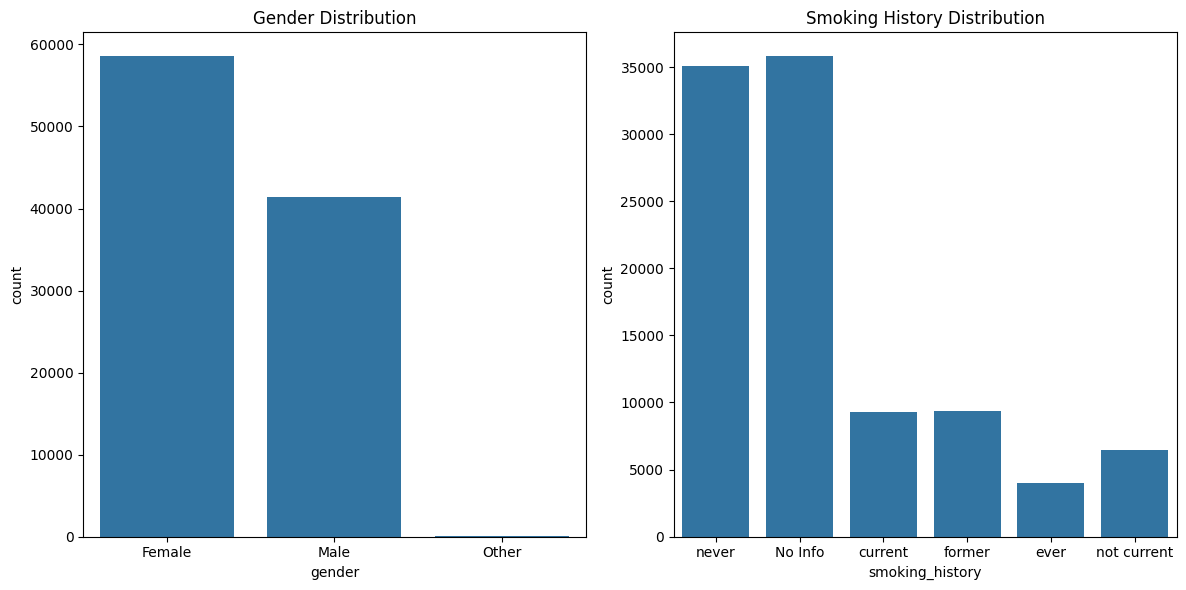

In [ ]:
# Investigate the distribution of categorical variables like gender and smoking history
plt.figure(figsize=(12, 6))

# Gender distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')

# Smoking history distribution
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='smoking_history')
plt.title('Smoking History Distribution')

plt.tight_layout()
plt.show()


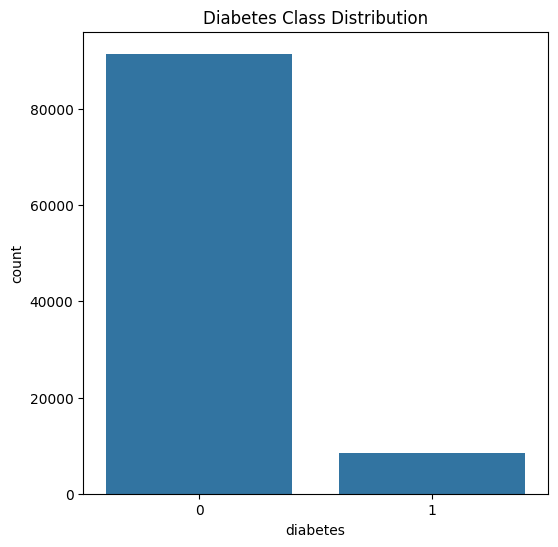

In [ ]:
# Class distribution of the target variable (diabetes)
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='diabetes')
plt.title('Diabetes Class Distribution')
plt.show()


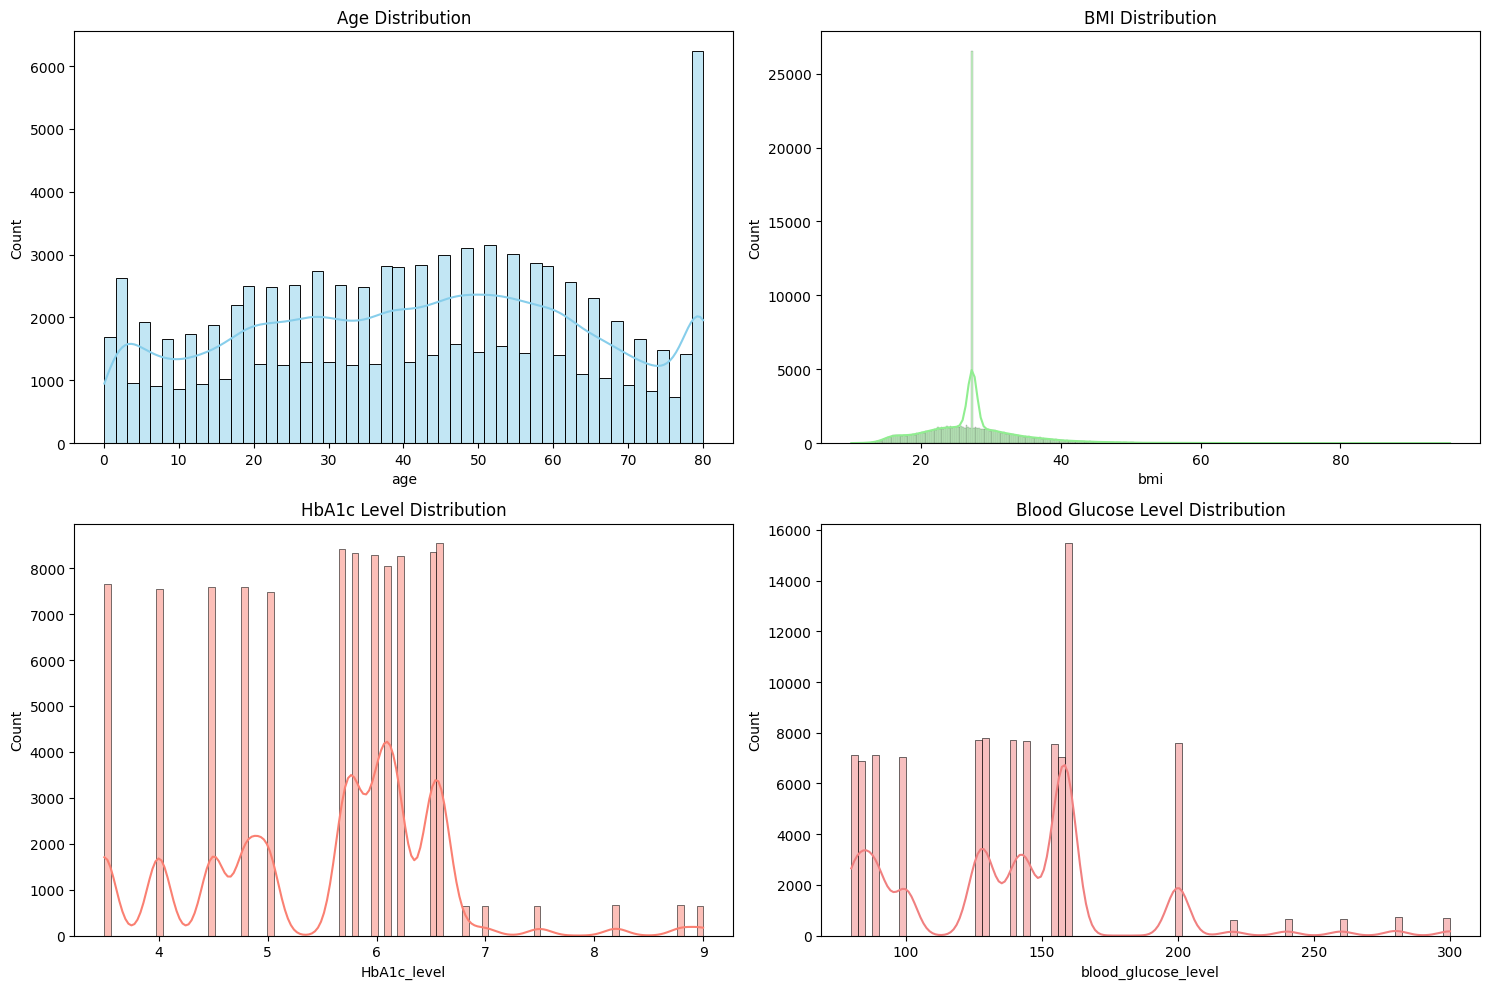

In [ ]:
# Visualize the distribution of key continuous variables
plt.figure(figsize=(15, 10))


# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# BMI distribution
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True, color='lightgreen')
plt.title('BMI Distribution')

# HbA1c level distribution
plt.subplot(2, 2, 3)
sns.histplot(df['HbA1c_level'], kde=True, color='salmon')
plt.title('HbA1c Level Distribution')

# Blood Glucose Level distribution
plt.subplot(2, 2, 4)
sns.histplot(df['blood_glucose_level'], kde=True, color='lightcoral')
plt.title('Blood Glucose Level Distribution')

plt.tight_layout()
plt.show()


<ipython-input-7-d31168481ae1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bmi_category', palette='Set2')


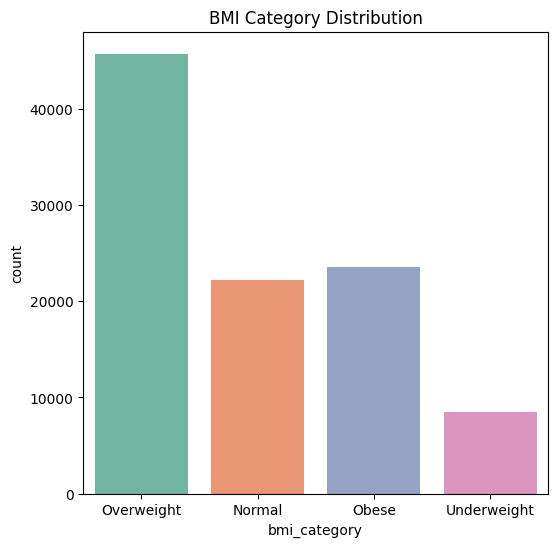

In [ ]:
# Categorize BMI into standard groups
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Visualize the BMI category distribution
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='bmi_category', palette='Set2')
plt.title('BMI Category Distribution')
plt.show()


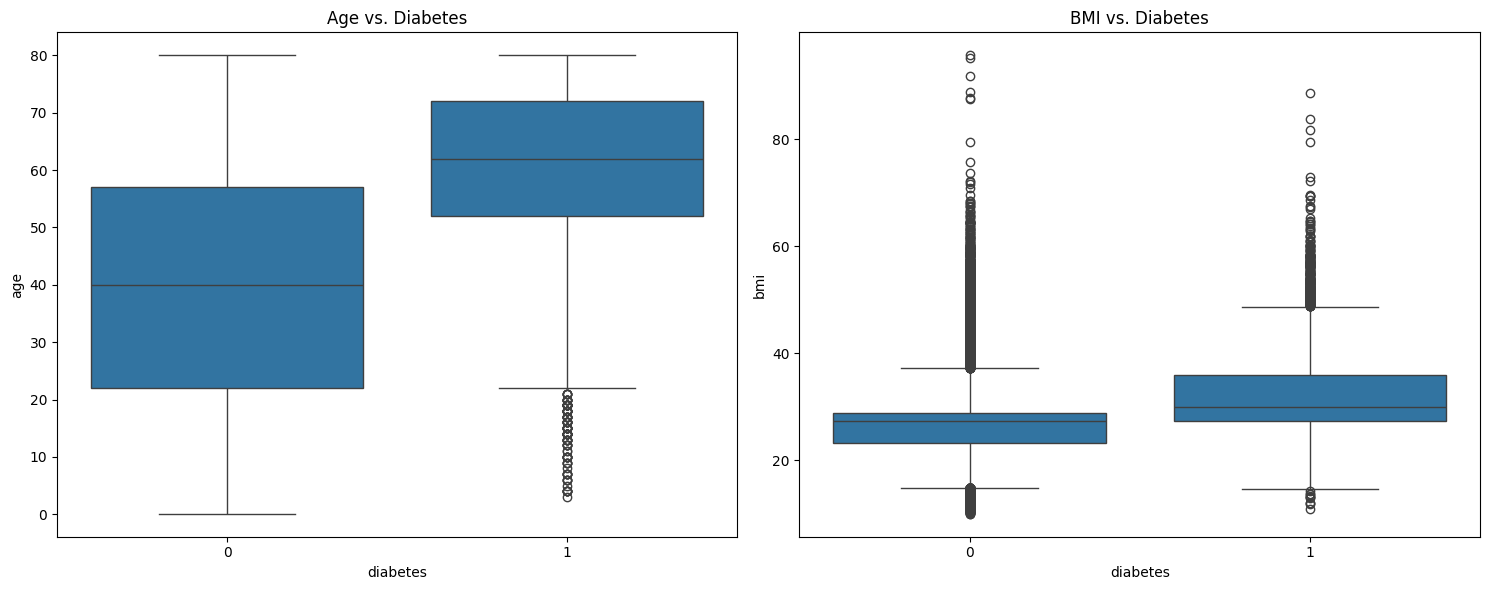

In [ ]:
# Visualize relationships between age and diabetes, and bmi and diabetes
plt.figure(figsize=(15, 6))

# Age vs. Diabetes
plt.subplot(1, 2, 1)
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs. Diabetes')

# BMI vs. Diabetes
plt.subplot(1, 2, 2)
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs. Diabetes')

plt.tight_layout()
plt.show()


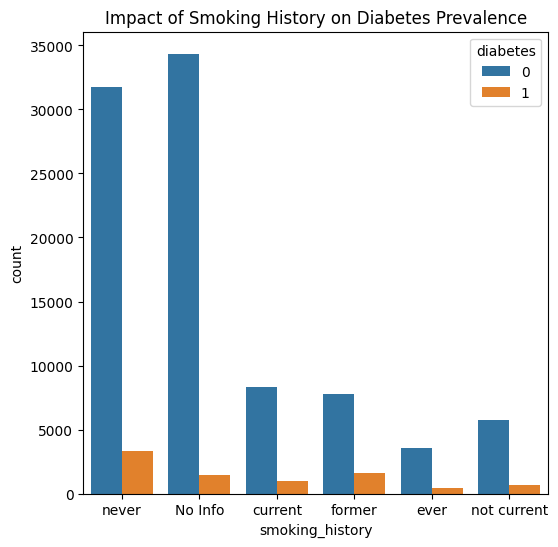

In [ ]:
# Investigate smoking history vs. diabetes prevalence
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes')
plt.title('Impact of Smoking History on Diabetes Prevalence')
plt.show()


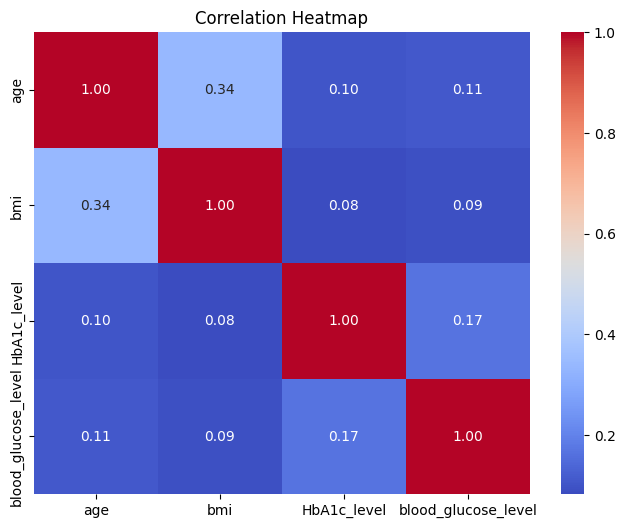

In [ ]:
# Correlation matrix for continuous features
correlation_matrix = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


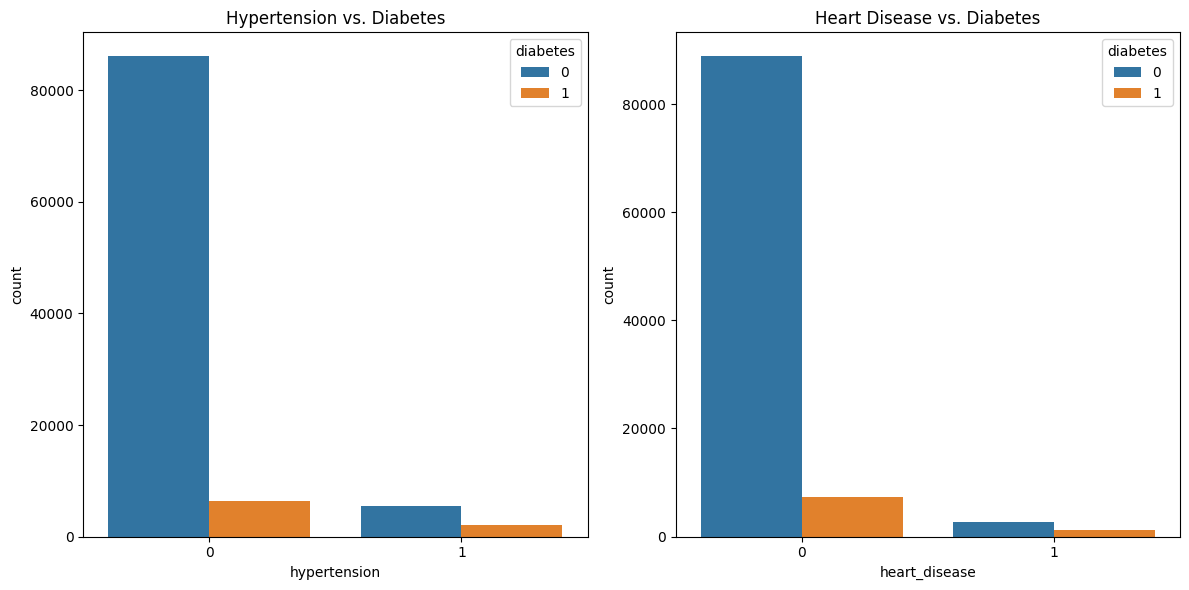

In [ ]:
# Study the co-occurrence of hypertension and heart disease with diabetes
plt.figure(figsize=(12, 6))

# Hypertension vs. Diabetes
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.title('Hypertension vs. Diabetes')

# Heart Disease vs. Diabetes
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.title('Heart Disease vs. Diabetes')

plt.tight_layout()
plt.show()


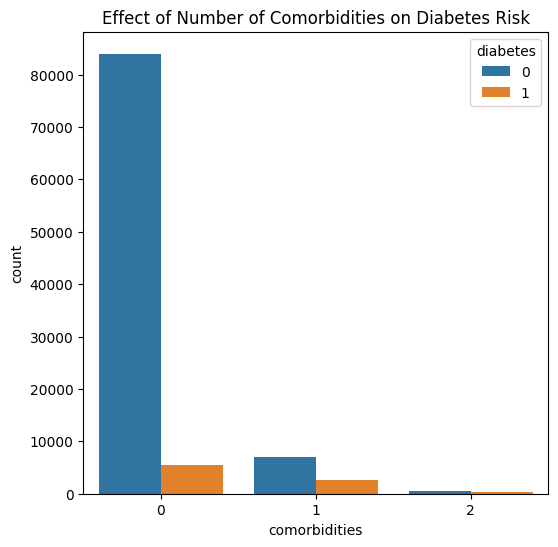

In [ ]:
# Create a new column for the number of comorbidities
df['comorbidities'] = df[['hypertension', 'heart_disease']].sum(axis=1)

# Visualize the relationship between number of comorbidities and diabetes risk
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='comorbidities', hue='diabetes')
plt.title('Effect of Number of Comorbidities on Diabetes Risk')
plt.show()


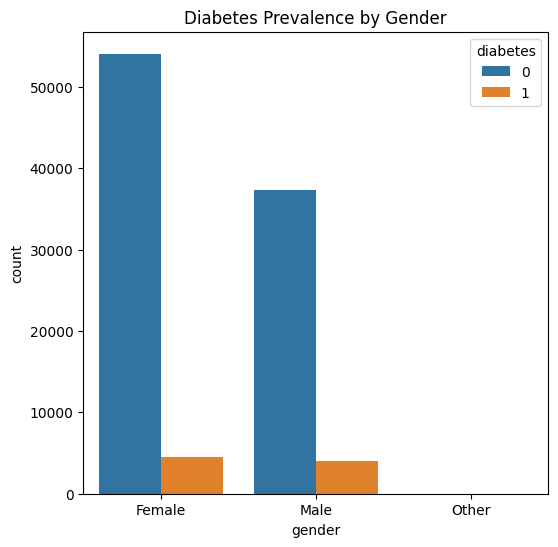

In [ ]:
# Compare diabetes prevalence across different gender categories
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='gender', hue='diabetes')
plt.title('Diabetes Prevalence by Gender')
plt.show()


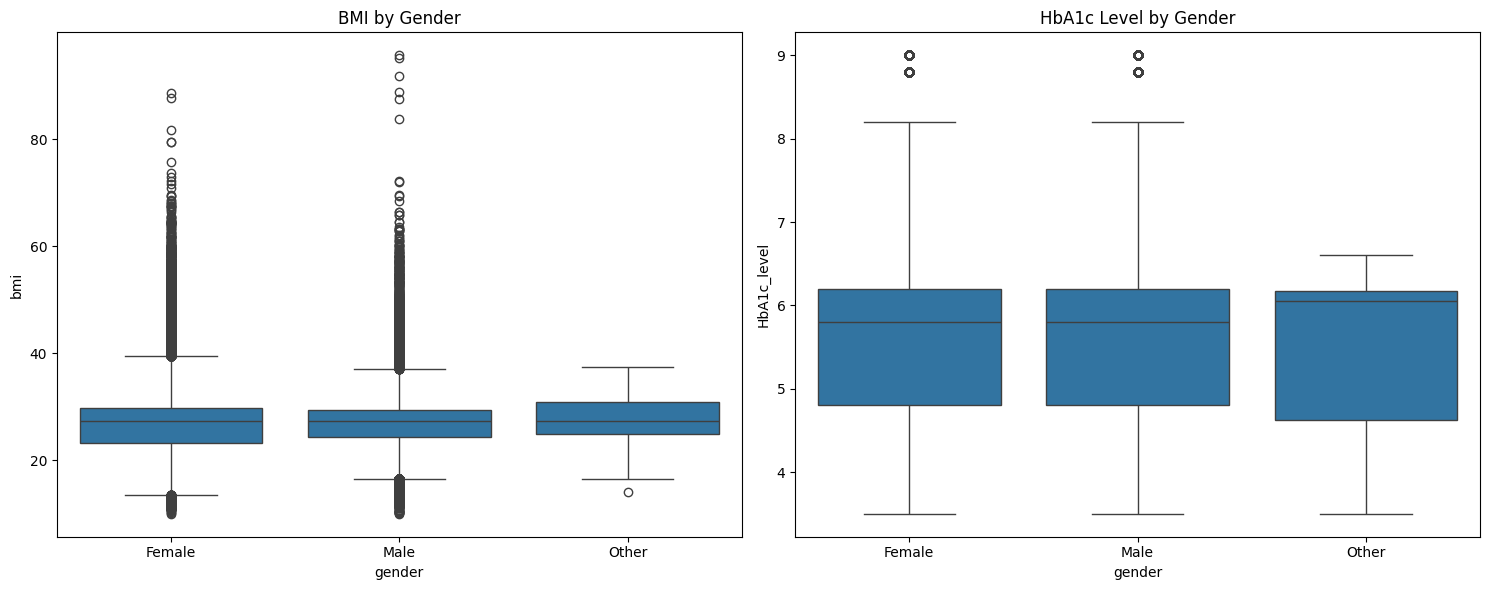

In [ ]:
# Compare BMI and HbA1c level by gender
plt.figure(figsize=(15, 6))

# BMI by gender
plt.subplot(1, 2, 1)
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI by Gender')

# HbA1c level by gender
plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c Level by Gender')

plt.tight_layout()
plt.show()


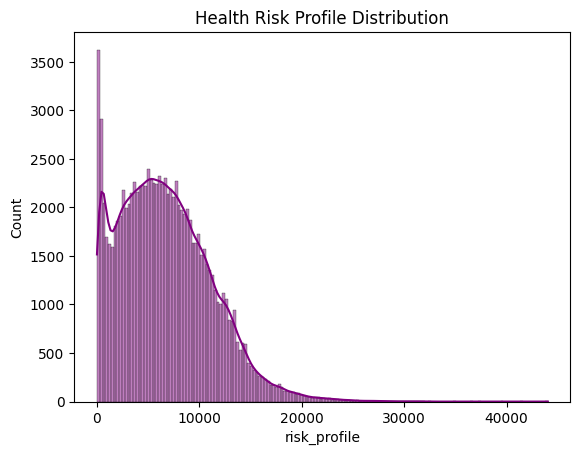

In [ ]:
# Create a risk profile based on age, bmi, and HbA1c
df['risk_profile'] = df['age'] * df['bmi'] * df['HbA1c_level']

# Visualize risk profile distribution
sns.histplot(df['risk_profile'], kde=True, color='purple')
plt.title('Health Risk Profile Distribution')
plt.show()


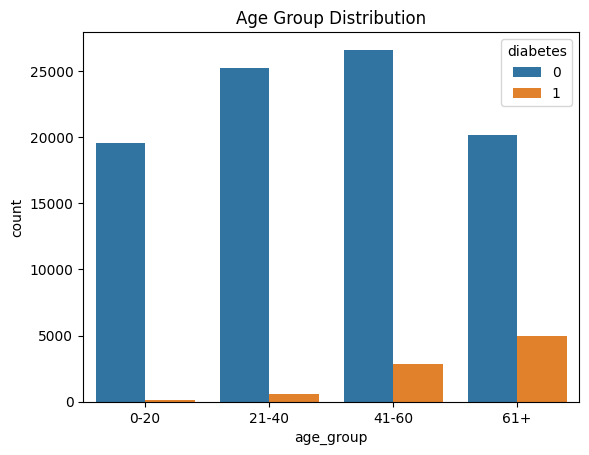

In [ ]:
# Age groups
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Visualize age groups
sns.countplot(data=df, x='age_group', hue='diabetes')
plt.title('Age Group Distribution')
plt.show()


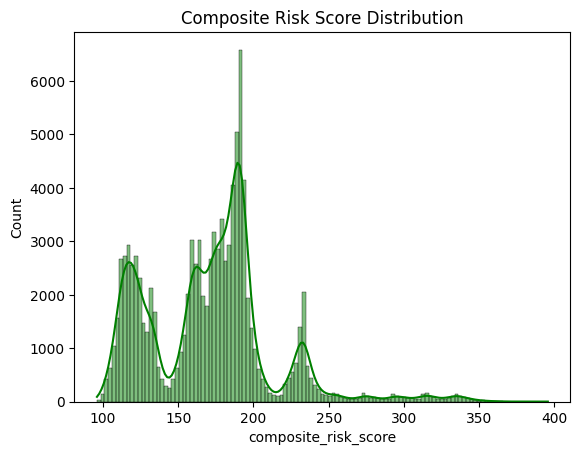

In [ ]:
# Create a composite risk score based on bmi, HbA1c, and blood glucose level
df['composite_risk_score'] = df['bmi'] + df['HbA1c_level'] + df['blood_glucose_level']

# Visualize the composite risk score distribution
sns.histplot(df['composite_risk_score'], kde=True, color='green')
plt.title('Composite Risk Score Distribution')
plt.show()


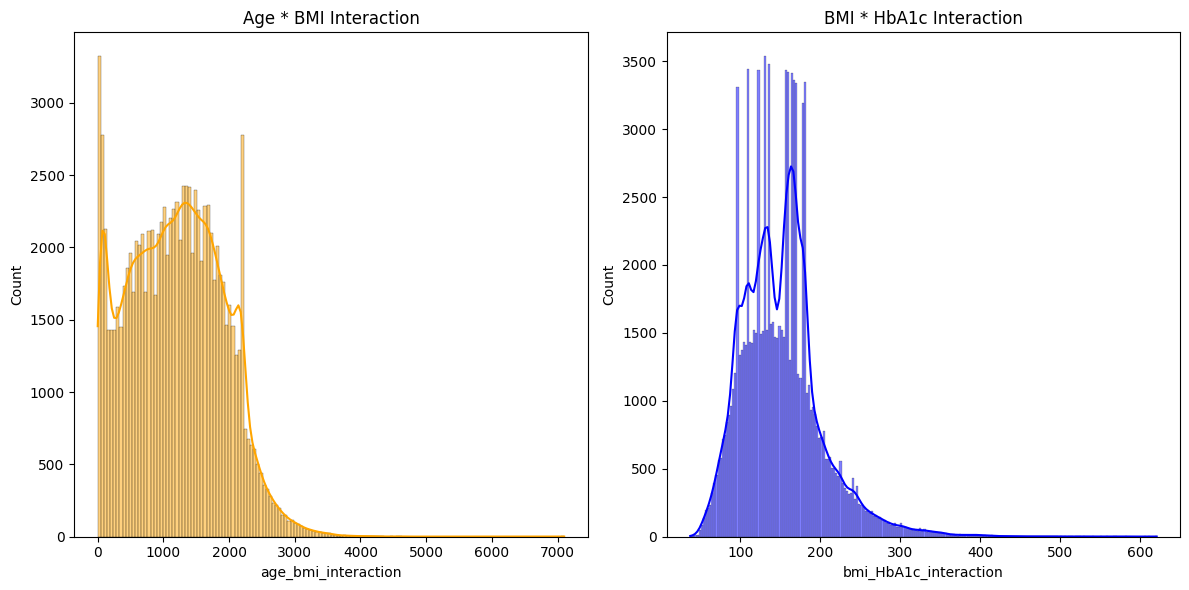

In [ ]:
# Create interaction terms
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['bmi_HbA1c_interaction'] = df['bmi'] * df['HbA1c_level']

# Visualize the distribution of interaction terms
plt.figure(figsize=(12, 6))

# Age * BMI interaction term
plt.subplot(1, 2, 1)
sns.histplot(df['age_bmi_interaction'], kde=True, color='orange')
plt.title('Age * BMI Interaction')

# BMI * HbA1c interaction term
plt.subplot(1, 2, 2)
sns.histplot(df['bmi_HbA1c_interaction'], kde=True, color='blue')
plt.title('BMI * HbA1c Interaction')

plt.tight_layout()
plt.show()
